# Heart Attack Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [6]:
df=pd.read_csv(r"C:\Users\nkman\Downloads\heart_attack_dataset mani.csv")

In [7]:
df.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,77,1,135.959228,81.479111,38.211834,140.137549,75.856273,1,0,0
1,72,0,275.464586,157.781871,64.394457,132.987124,100.544884,0,0,0
2,46,1,175.008418,123.552689,60.452510,95.902628,80.864302,0,1,0
3,79,0,176.208950,108.625174,50.758774,104.571584,93.443182,0,0,0
4,59,0,175.302136,126.250726,40.879459,160.189154,87.375129,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.3 KB


In [9]:
for i in df.columns:
    print(f"{i}")
    print(f"{df[i].nunique()}")

age
55
sex
2
total_cholesterol
986
ldl
992
hdl
1000
systolic_bp
982
diastolic_bp
999
smoking
2
diabetes
2
heart_attack
2


In [10]:
df["heart_attack"].value_counts()

heart_attack
0    896
1    104
Name: count, dtype: int64

In [11]:
max_count=df["heart_attack"].value_counts().max()
max_count

np.int64(896)

In [12]:
upsampled_list=[]
from sklearn.utils import resample
for cls in df["heart_attack"].unique():
    cls_data=df[df["heart_attack"]==cls]
    cls_upsampled=resample(
        cls_data,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    upsampled_list.append(cls_upsampled)
data_balanced=pd.concat(upsampled_list)
data_balanced=data_balanced.sample(frac=1,random_state=42).reset_index(drop=True)    

In [13]:
print("\nAfter balancing:")
print(data_balanced["heart_attack"].value_counts())


After balancing:
heart_attack
0    896
1    896
Name: count, dtype: int64


In [14]:
data_balanced.shape

(1792, 10)

In [15]:
data_balanced.sample(5)

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
1677,57,0,199.428439,144.660759,45.371843,166.130324,80.777599,0,0,0
1301,32,1,174.454094,115.309145,32.342898,136.291551,68.341452,1,0,1
604,32,1,174.454094,115.309145,32.342898,136.291551,68.341452,1,0,1
43,43,1,196.970593,98.857284,39.764477,125.070764,82.600606,1,1,1
1756,71,0,183.813367,138.059843,37.232270,138.338590,74.093254,1,1,0


In [16]:
data_balanced.isna().sum()

age                  0
sex                  0
total_cholesterol    0
ldl                  0
hdl                  0
systolic_bp          0
diastolic_bp         0
smoking              0
diabetes             0
heart_attack         0
dtype: int64

In [17]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1792 non-null   int64  
 1   sex                1792 non-null   int64  
 2   total_cholesterol  1792 non-null   float64
 3   ldl                1792 non-null   float64
 4   hdl                1792 non-null   float64
 5   systolic_bp        1792 non-null   float64
 6   diastolic_bp       1792 non-null   float64
 7   smoking            1792 non-null   int64  
 8   diabetes           1792 non-null   int64  
 9   heart_attack       1792 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 140.1 KB


In [18]:
df=data_balanced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1792 non-null   int64  
 1   sex                1792 non-null   int64  
 2   total_cholesterol  1792 non-null   float64
 3   ldl                1792 non-null   float64
 4   hdl                1792 non-null   float64
 5   systolic_bp        1792 non-null   float64
 6   diastolic_bp       1792 non-null   float64
 7   smoking            1792 non-null   int64  
 8   diabetes           1792 non-null   int64  
 9   heart_attack       1792 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 140.1 KB


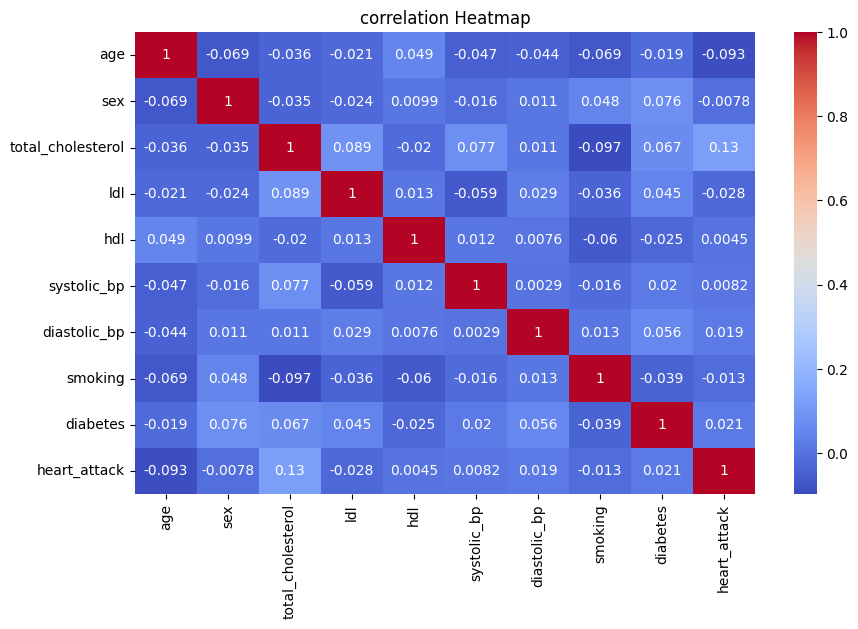

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("correlation Heatmap")
plt.show()

In [20]:
x = df.drop("heart_attack", axis=1)
y = df["heart_attack"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
preprocessor=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("scaler",StandardScaler())
])

In [22]:
model={
    "Naive Bayes":{
        "models":MultinomialNB(),
        "param_grid":{
            "alpha":[0.1,0.5,1,0]
        }
    }
},

models = {
    "Logistic Regression": {
        "model": LogisticRegression(solver='lbfgs', max_iter=500, random_state=4),
        "param_grid": {
            "C": [0.1, 1, 10],
            "penalty": ['l2']
        }
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },

    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    },

    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },

    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },

    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  # Manhattan (L1) or Euclidean (L2)
        }
    },

    "MLP Classifier": {
        "model": MLPClassifier(random_state=42),
        "param_grid": {
            "hidden_layer_sizes": [(5,), (100,)],
            "activation": ["relu", "tanh"],
            "solver": ["adam"],
            "max_iter": [200]
        }
    },

    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}

print(f"Total Models Loaded: {len(models)}")

Total Models Loaded: 9


In [23]:


results = []
best_score = -float('inf')
best_model = None
best_name = None

# Run GridSearchCV for each classification model
for name, mp in models.items():
    print(f"\nRunning GridSearchCV for {name}...")

    # Grid search with cross-validation
    grid = GridSearchCV(mp['model'], param_grid=mp['param_grid'], cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)

    # Predictions
    y_pred = grid.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Save results
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    # Print model results
    print(f"{name} Best CV Score (Accuracy): {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Track best model
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

# Output summary
results_df = pd.DataFrame(results)
print("\nSummary Results:")
print(results_df)

print(f"\nBest Model: {best_name}")
print(f"Best CV Score (Accuracy): {best_score:.4f}")




Running GridSearchCV for Logistic Regression...
Logistic Regression Best CV Score (Accuracy): 0.5555
Logistic Regression Best Params: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       181
           1       0.54      0.54      0.54       178

    accuracy                           0.55       359
   macro avg       0.55      0.55      0.55       359
weighted avg       0.55      0.55      0.55       359


Running GridSearchCV for Decision Tree...
Decision Tree Best CV Score (Accuracy): 0.9309
Decision Tree Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       181
           1       0.98      1.00      0.99       178

    accuracy                           0.99       359
   macro avg       0.99     

# Confusion Matrix

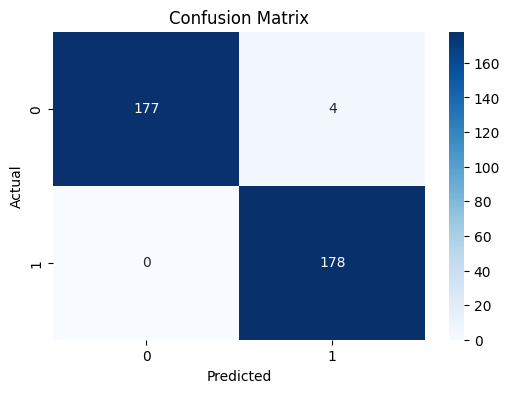

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
feature_columns = x.columns.to_list()
import joblib
joblib.dump(feature_columns, '17.Heart Attack.joblib')


['17.Heart Attack.joblib']

In [26]:
joblib.dump(best_model,'best_model 17.Heart Attack.joblib')

['best_model 17.Heart Attack.joblib']